**Executed:** Mon Oct  3 16:19:59 2016

**Duration:** 23 seconds.

# 8-pixel DCR

> *This notebook computes the detectors DCR for the two 8-pixel arrays used for the 8-spot smFRET measurements*

## Load software

In [1]:
import phconvert as phc
phc.__version__

'0.7.2'

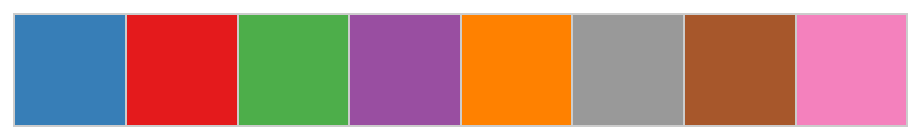

In [2]:
from __future__ import division
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from cycler import cycler
%matplotlib inline
%config InlineBackend.figure_format='retina'  # for hi-dpi displays

sns.set_style('whitegrid')
#sns.set_palette('deep')

# palette = ('Paired', 10)
# sns.palplot(sns.color_palette(*palette))
# sns.set_palette(*palette)

bmap = sns.color_palette("Set1", 9)
colors = np.array(bmap)[(1,0,2,3,4,8,6,7), :]
sns.palplot(sns.color_palette(colors))
sns.set_palette(colors)

## Load data

In [3]:
fname = 'DCR_test_2.hdf5'
data_dir = './data/2014-02-26/'

In [4]:
full_fname = data_dir + fname

In [5]:
d = phc.hdf5.load_photon_hdf5(full_fname, require_setup=False)

In [6]:
type(d._v_file)

tables.file.File

## Compute DCR

In [7]:
# Compute DCR
A_em = phc.hdf5.photon_data_mapping(d._v_file, 'detectors')

In [8]:
A_em = [a.read().view(bool) for a in A_em.values()]
accept_dcr = [a.sum()/d.acquisition_duration.read() for a in A_em]
donor_dcr = [(~a).sum()/d.acquisition_duration.read() for a in A_em]

# Make a DataFrame
dcr_data = pd.DataFrame(columns = ['Donor DCR', 'Acceptor DCR'])
dcr_data['Donor DCR'] = donor_dcr
dcr_data['Acceptor DCR'] = accept_dcr
dcr_data.index.name = 'CH'

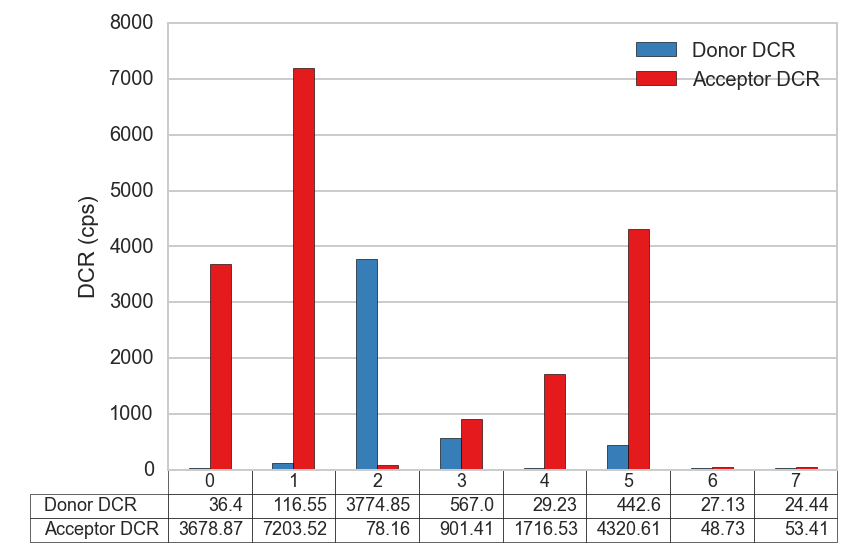

In [9]:
# Output plot and tables
dcr_data.plot.bar(table=np.round(dcr_data, 2).T)
plt.ylabel('DCR (cps)')
plt.gca().xaxis.set_visible(False)

## Save results

In [10]:
dcr_data.to_csv('results/8-pixels_DCR.csv')

In [11]:
pd.read_csv('results/8-pixels_DCR.csv', index_col=0)

,Donor DCR,Acceptor DCR
CH,,
0,36.396964,3678.865963
1,116.553640,7203.520196
2,3774.853615,78.159763
3,566.996656,901.414458
4,29.229483,1716.534345
5,442.598405,4320.610497
6,27.127090,48.726782
7,24.438899,53.412143


## Other

In [12]:
from fretbursts import *

 - Optimized (cython) burst search loaded.
 - Optimized (cython) photon counting loaded.


--------------------------------------------------------------
 You are running FRETBursts (version 0.5.9).

 If you use this software please cite the following paper:

   FRETBursts: An Open Source Toolkit for Analysis of Freely-Diffusing Single-Molecule FRET
   Ingargiola et al. (2016). http://dx.doi.org/10.1371/journal.pone.0160716 

--------------------------------------------------------------


In [13]:
def compute_dcr(d):
    # Compute DCR
    accept_dcr = [a.sum()/(d.time_max - d.time_min) for a in d.A_em]
    donor_dcr = [(~a).sum()/(d.time_max - d.time_min) for a in d.A_em]

    # Make a DataFrame
    dcr_data = pd.DataFrame(columns = ['Donor DCR', 'Acceptor DCR'])
    dcr_data['Donor DCR'] = donor_dcr
    dcr_data['Acceptor DCR'] = accept_dcr
    dcr_data.index.name = 'CH'
    return dcr_data

In [14]:
d = loader.photon_hdf5(full_fname)

In [15]:
d_small = d.slice_ph(time_s2=30)

In [16]:
dcr_small = compute_dcr(d_small)
dcr_small

,Donor DCR,Acceptor DCR
CH,,
0,36.233338,3734.400448
1,116.033347,7282.700874
2,3774.933786,144.266684
3,571.066735,971.800117
4,28.966670,1775.133546
5,447.533387,4375.567192
6,28.033337,120.600014
7,23.766670,126.433349


In [17]:
print('Percentage DCR change:')
100*(dcr_small - dcr_data)/dcr_data

Percentage DCR change:


,Donor DCR,Acceptor DCR
CH,,
0,-0.449561,1.509554
1,-0.446398,1.099194
2,0.002124,84.579223
3,0.717831,7.808357
4,-0.899136,3.413809
5,1.115002,1.271966
6,3.340743,147.502524
7,-2.750653,136.712742


In [18]:
print('Percentage DCR change:')
100*(dcr_small - dcr_data)/dcr_data

Percentage DCR change:


,Donor DCR,Acceptor DCR
CH,,
0,-0.449561,1.509554
1,-0.446398,1.099194
2,0.002124,84.579223
3,0.717831,7.808357
4,-0.899136,3.413809
5,1.115002,1.271966
6,3.340743,147.502524
7,-2.750653,136.712742


In [19]:
#d.calc_bg(fun=fb.bg.raw_fit, time_s=30)

In [20]:
#%matplotlib qt

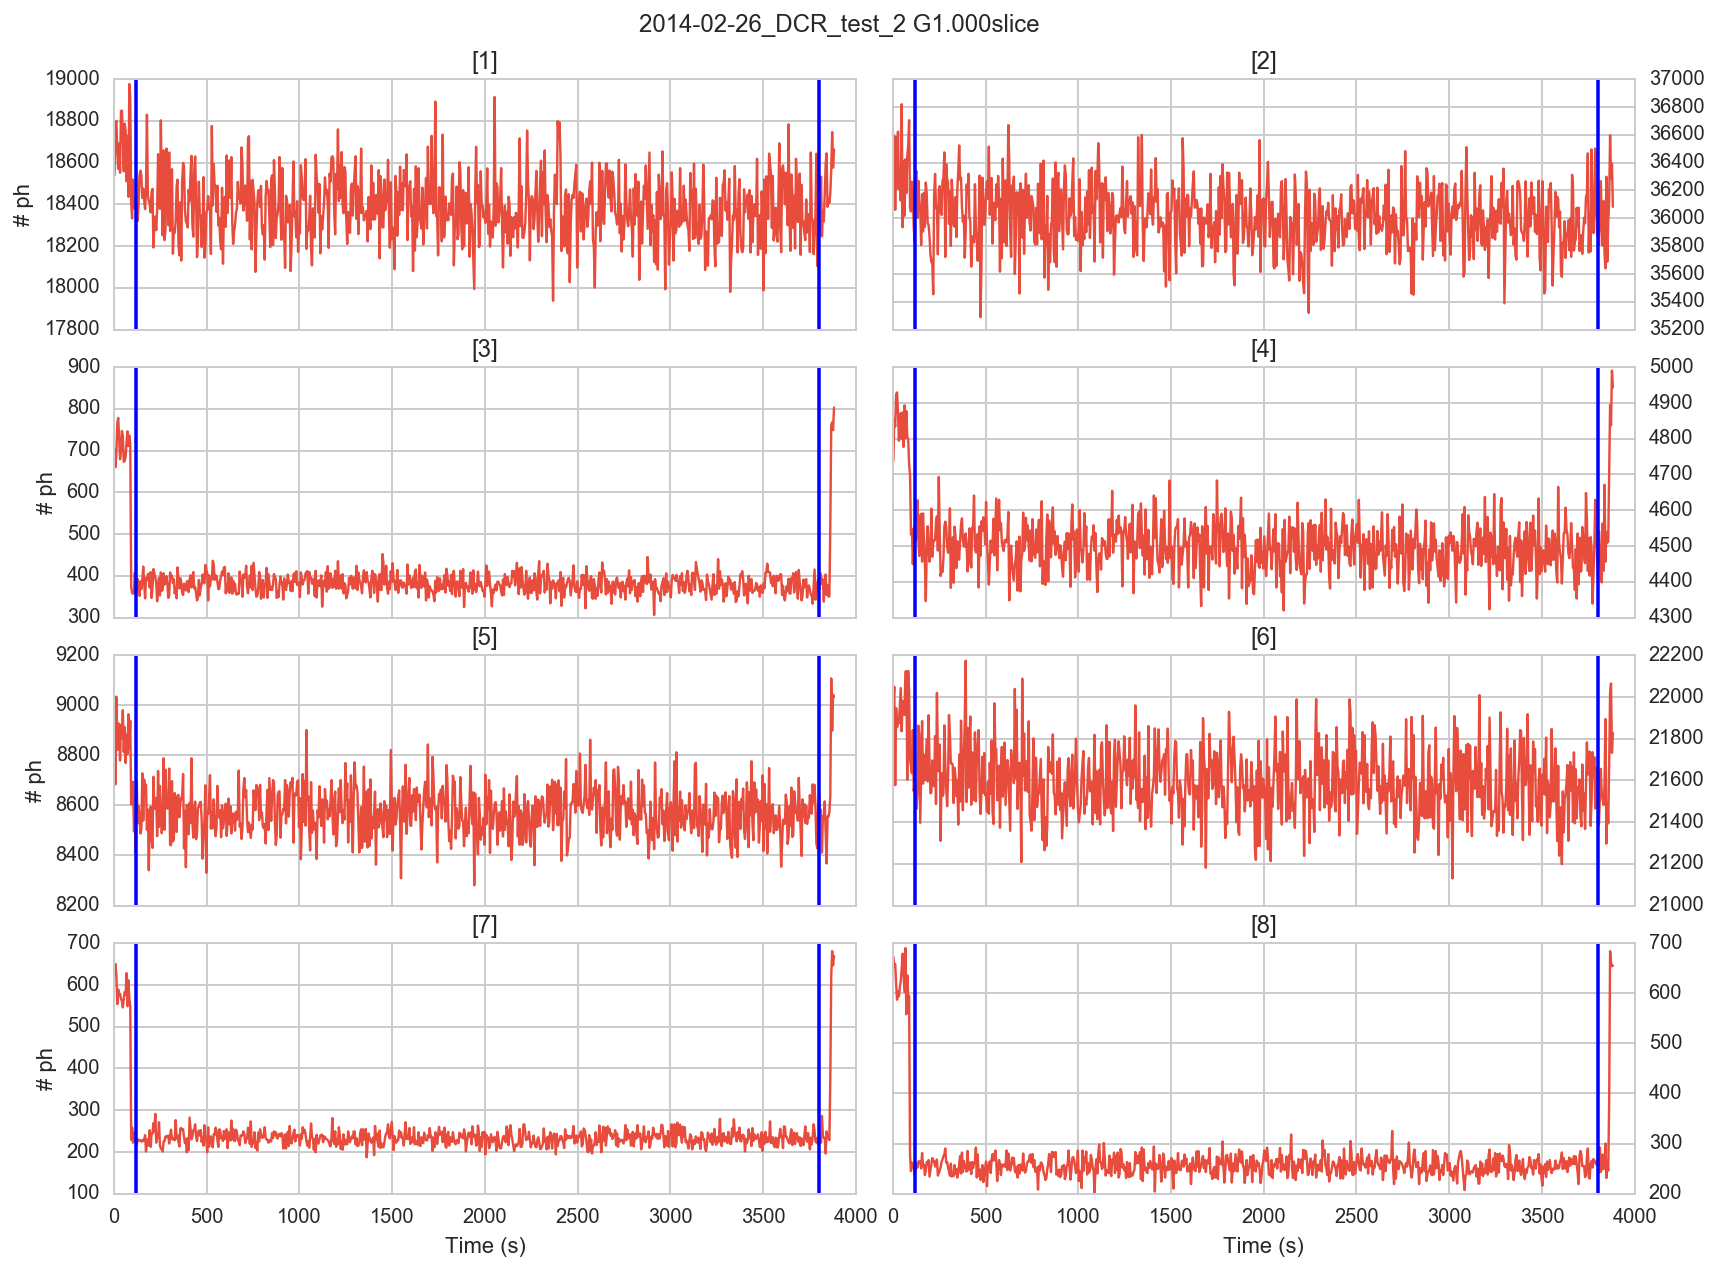

In [21]:
Ax = dplot(d, timetrace_single, ph_sel=Ph_sel(Dex='Aem'), binwidth=5, 
           tmax=None, show_rate_th=False, sharey=False, set_ax_limits=False)
for ax in Ax.ravel():
    ax.axvline(120)
    ax.axvline(3800)

In [22]:
d_sel = d.slice_ph(time_s1=120, time_s2=3800)
dcr_sel = compute_dcr(d_sel)
dcr_sel

,Donor DCR,Acceptor DCR
CH,,
0,36.392120,3676.643794
1,116.500545,7200.971282
2,3774.295154,76.157066
3,566.950279,899.122022
4,29.253533,1714.619857
5,442.541853,4318.349236
6,27.119294,46.556794
7,24.428533,51.166305


In [23]:
dcr_sel - dcr_data

,Donor DCR,Acceptor DCR
CH,,
0,-0.004844,-2.222169
1,-0.053095,-2.548914
2,-0.558461,-2.002697
3,-0.046377,-2.292437
4,0.024050,-1.914488
5,-0.056552,-2.261260
6,-0.007796,-2.169988
7,-0.010366,-2.245838


In [24]:
d_sel.calc_bg(bg.exp_fit, time_s=30, tail_min_us='auto')

 - Calculating BG rates ... 

[DONE]


In [25]:
raw_bg_rates_d = np.asfarray(d_sel.bg_dd).mean(1)
raw_bg_rates_a = np.asfarray(d_sel.bg_ad).mean(1)

dcr_sel['Donor DCR tail fit'] = raw_bg_rates_d
dcr_sel['Acceptor DCR tail fit'] = raw_bg_rates_a

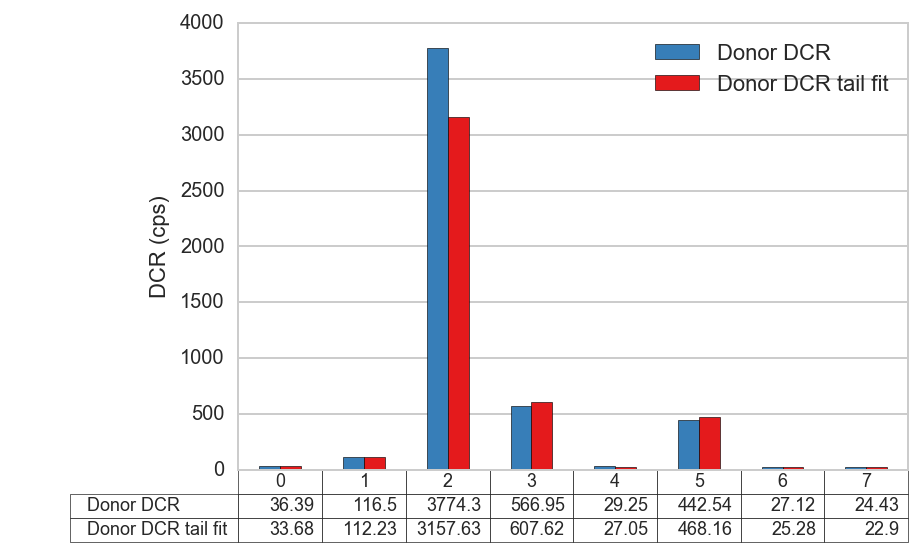

In [26]:
dcr_sel_d = dcr_sel[['Donor DCR', 'Donor DCR tail fit']]
dcr_sel_d.plot.bar(table=np.round(dcr_sel_d, 2).T)
plt.ylabel('DCR (cps)')
plt.gca().xaxis.set_visible(False)

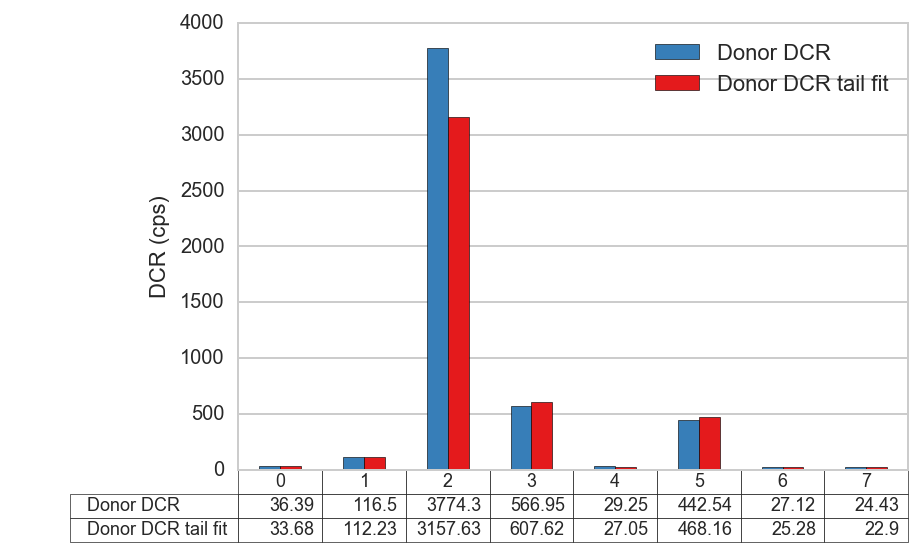

In [27]:
dcr_sel_a = dcr_sel[['Acceptor DCR', 'Acceptor DCR tail fit']]
dcr_sel_d.plot.bar(table=np.round(dcr_sel_d, 2).T)
plt.ylabel('DCR (cps)')
plt.gca().xaxis.set_visible(False)

In [28]:
dcr_sel

,Donor DCR,Acceptor DCR,Donor DCR tail fit,Acceptor DCR tail fit
CH,,,,
0,36.392120,3676.643794,33.677327,3943.257845
1,116.500545,7200.971282,112.234983,7097.247407
2,3774.295154,76.157066,3157.632975,74.057055
3,566.950279,899.122022,607.619321,995.778374
4,29.253533,1714.619857,27.052542,1820.303959
5,442.541853,4318.349236,468.158390,4330.787621
6,27.119294,46.556794,25.277385,45.457871
7,24.428533,51.166305,22.898843,49.685022
